In [1]:
import torch
print(torch.__version__)

2.5.1+cu124


In [2]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.5.1+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.1 MB/s eta 0:00:00


In [3]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00


In [6]:
import matplotlib.pyplot as plt
from torch.optim import Adam
from sklearn.manifold import TSNE
from torch.nn import CrossEntropyLoss
from torch_geometric.datasets import Planetoid
from model_utils import train
from models import GCN

In [7]:
data = Planetoid('data', 'Cora')

Processing...
Done!


In [8]:
dataset = data[0]

In [9]:
dataset

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [11]:
model = GCN(num_classes=7)

In [13]:
optimizer = Adam(model.parameters(), lr=0.0001)

In [15]:
criterion = CrossEntropyLoss()

In [12]:
model

GCN(
  (conv1): GCNConv(-1, 64)
  (conv2): GCNConv(-1, 128)
  (linear1): Linear(128, 7, bias=True)
)

In [18]:
train(model=model, dataset=dataset, optimizer=optimizer, criterion=criterion, epochs=50)

Epoch: 000, Loss: 1.9253
Epoch: 001, Loss: 1.9244
Epoch: 002, Loss: 1.9191
Epoch: 003, Loss: 1.9207
Epoch: 004, Loss: 1.9172
Epoch: 005, Loss: 1.9123
Epoch: 006, Loss: 1.9109
Epoch: 007, Loss: 1.9125
Epoch: 008, Loss: 1.9070
Epoch: 009, Loss: 1.9045
Epoch: 010, Loss: 1.9077
Epoch: 011, Loss: 1.9035
Epoch: 012, Loss: 1.9059
Epoch: 013, Loss: 1.8978
Epoch: 014, Loss: 1.8999
Epoch: 015, Loss: 1.8947
Epoch: 016, Loss: 1.8927
Epoch: 017, Loss: 1.8938
Epoch: 018, Loss: 1.8891
Epoch: 019, Loss: 1.8846
Epoch: 020, Loss: 1.8863
Epoch: 021, Loss: 1.8813
Epoch: 022, Loss: 1.8813
Epoch: 023, Loss: 1.8776
Epoch: 024, Loss: 1.8742
Epoch: 025, Loss: 1.8769
Epoch: 026, Loss: 1.8750
Epoch: 027, Loss: 1.8702
Epoch: 028, Loss: 1.8681
Epoch: 029, Loss: 1.8642
Epoch: 030, Loss: 1.8602
Epoch: 031, Loss: 1.8582
Epoch: 032, Loss: 1.8550
Epoch: 033, Loss: 1.8569
Epoch: 034, Loss: 1.8557
Epoch: 035, Loss: 1.8501
Epoch: 036, Loss: 1.8505
Epoch: 037, Loss: 1.8409
Epoch: 038, Loss: 1.8505
Epoch: 039, Loss: 1.8423


In [21]:
node_embeddings = model.conv1(dataset.x, dataset.edge_index).detach().cpu().numpy()
node_embeddings

array([[ 0.0371203 ,  0.0486295 ,  0.02218815, ...,  0.04906463,
        -0.07235148, -0.10392369],
       [-0.02926849, -0.09242422, -0.00240445, ..., -0.07268421,
         0.12669528,  0.2071006 ],
       [ 0.01826789,  0.04987105, -0.0336882 , ...,  0.01307323,
         0.03756342, -0.02395835],
       ...,
       [ 0.02047661, -0.05136396,  0.16801628, ..., -0.01350001,
        -0.00239078, -0.02501721],
       [ 0.01900492, -0.01101654, -0.06357611, ...,  0.17614745,
         0.02912222,  0.09841657],
       [ 0.07808767,  0.03675744, -0.02275202, ...,  0.14330128,
        -0.0002246 , -0.00055029]], dtype=float32)

In [10]:
labels = dataset.y.detach().cpu().numpy()

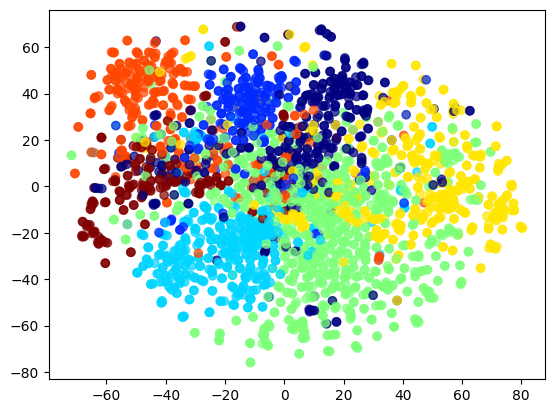

In [22]:
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1],
            c=labels, cmap='jet', alpha=0.7)